In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data_credits = pd.read_csv('tmdb_5000_credits.csv')
data_movies = pd.read_csv('tmdb_5000_movies.csv')

#Preprocessing

In [2]:
data_credits = pd.DataFrame(data_credits)
data_credits.head(2)
data_credits.shape

(4803, 4)

In [3]:
data_movies = pd.DataFrame(data_movies)
data_movies.head(2)
data_movies.shape

(4803, 20)

## merging the credits and movies

In [4]:
movies = data_movies.merge(data_credits,on='title')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## feature selection
### movie_id , title , overview , genres , keywords , cast, crew





In [5]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head(2)
movies.isnull().sum()

,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0


##handling missing values (by removing)

In [6]:
movies.dropna(inplace=True)
movies.isnull().sum()

<ipython-input-6-b9ad264b2834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)


,0
movie_id,0
title,0
overview,0
genres,0
keywords,0
cast,0
crew,0


##checking duplicates

In [7]:
movies.duplicated().sum()

0

## Converting the data in suitable type

In [8]:
import json
def convert(lt):
  l = []
  for i in json.loads(lt):
    l.append(i['name'])
  return l

In [9]:
movies

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [10]:
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)

###considering only top 3 casts

In [11]:
def convert_cast(lt):
  l = []
  for i in json.loads(lt):
    l.append(i['name'])
    if len(l) == 3:
      break
  return l

movies['cast'] = movies['cast'].apply(convert_cast)

###Considering director only

In [12]:
def convert_crew(lt):
  l = []
  for i in json.loads(lt):
    if i['job'] == 'Director':
      l.append(i['name'])
      break
  return l

movies['crew'] = movies['crew'].apply(convert_crew)

###converting overview from string to list of tags

In [13]:
movies['overview'] = list(movies['overview'].apply(lambda x:x.split()))
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

###converting names to strings without spaces.

In [14]:
def remove_space(lt):
  l = []
  for i in lt:
    l.append(i.replace(" ",""))
  return l

movies['cast'] = movies['cast'].apply(remove_space)
movies['crew'] = movies['crew'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)

In [15]:
t = movies['title'].apply(remove_space)
names = t.apply(lambda x: ''.join(x))
names = names.apply(lambda x: [x])

###making a new column consisting all the tags and removing old columns

In [16]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew'] + names
movies.drop(columns=['overview','genres','keywords','cast','crew'],inplace=True)

In [17]:
movies[movies['title'] == 'Iron Man']['tags'].values[0]

['After',
 'being',
 'held',
 'captive',
 'in',
 'an',
 'Afghan',
 'cave,',
 'billionaire',
 'engineer',
 'Tony',
 'Stark',
 'creates',
 'a',
 'unique',
 'weaponized',
 'suit',
 'of',
 'armor',
 'to',
 'fight',
 'evil.',
 'Action',
 'ScienceFiction',
 'Adventure',
 'middleeast',
 'armsdealer',
 'malibu',
 'marvelcomic',
 'superhero',
 'basedoncomicbook',
 'tonystark',
 'ironman',
 'aftercreditsstinger',
 'marvelcinematicuniverse',
 'counterterrorism',
 'agentcoulson',
 'RobertDowneyJr.',
 'TerrenceHoward',
 'JeffBridges',
 'JonFavreau',
 'IronMan']

###converting tags list into paragraph and converting to lower case

In [18]:
movies['tags'] = movies['tags'].apply(lambda x:" ".join(x))
movies['tags'] = movies['tags'].apply(lambda x:x.lower())

In [19]:
import string
allowed_chars = string.ascii_letters + string.digits + string.whitespace
movies['tags'] = movies['tags'].apply(lambda x: ''.join(filter(lambda char: char in allowed_chars, x)))

In [20]:
movies[movies['title'] == 'Iron Man']['tags'].values[0]

'after being held captive in an afghan cave billionaire engineer tony stark creates a unique weaponized suit of armor to fight evil action sciencefiction adventure middleeast armsdealer malibu marvelcomic superhero basedoncomicbook tonystark ironman aftercreditsstinger marvelcinematicuniverse counterterrorism agentcoulson robertdowneyjr terrencehoward jeffbridges jonfavreau ironman'

##Tokenization

In [21]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [22]:
movies['tags'] = movies['tags'].apply(lambda x: tokenizer.tokenize(x))

## Stop word removal

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text if word.lower() not in sw]
    return " ".join(text)

In [25]:
movies['tags'][40]

['star',
 'race',
 'car',
 'lightning',
 'mcqueen',
 'and',
 'his',
 'pal',
 'mater',
 'head',
 'overseas',
 'to',
 'compete',
 'in',
 'the',
 'world',
 'grand',
 'prix',
 'race',
 'but',
 'the',
 'road',
 'to',
 'the',
 'championship',
 'becomes',
 'rocky',
 'as',
 'mater',
 'gets',
 'caught',
 'up',
 'in',
 'an',
 'intriguing',
 'adventure',
 'of',
 'his',
 'own',
 'international',
 'espionage',
 'animation',
 'family',
 'adventure',
 'comedy',
 'carrace',
 'sequel',
 'comedy',
 'anthropomorphism',
 'bestfriend',
 'duringcreditsstinger',
 'owenwilson',
 'larrythecableguy',
 'michaelcaine',
 'johnlasseter',
 'cars',
 '2']

In [26]:
movies['tags'] = movies['tags'].apply(stopwords)

In [27]:
movies['tags'][40]

'star race car lightning mcqueen pal mater head overseas compete world grand prix race road championship becomes rocky mater gets caught intriguing adventure international espionage animation family adventure comedy carrace sequel comedy anthropomorphism bestfriend duringcreditsstinger owenwilson larrythecableguy michaelcaine johnlasseter cars 2'

##Lammatization

In [28]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
movies['tags'] = lemmatize_verbs(movies['tags'])

In [30]:
movies['tags'][40]

'star race car lightning mcqueen pal mater head overseas compete world grand prix race road championship becomes rocky mater gets caught intriguing adventure international espionage animation family adventure comedy carrace sequel comedy anthropomorphism bestfriend duringcreditsstinger owenwilson larrythecableguy michaelcaine johnlasseter cars 2'

##Converting to Numerical data (TF-IDF)

In [31]:
tags = []
for k in movies['tags']:
  l = k.split()
  tags.append(l)

movies['tags'] = tags

In [32]:
movies[movies['title'] == 'Iron Man']['tags'].values[0]

['held',
 'captive',
 'afghan',
 'cave',
 'billionaire',
 'engineer',
 'tony',
 'stark',
 'creates',
 'unique',
 'weaponized',
 'suit',
 'armor',
 'fight',
 'evil',
 'action',
 'sciencefiction',
 'adventure',
 'middleeast',
 'armsdealer',
 'malibu',
 'marvelcomic',
 'superhero',
 'basedoncomicbook',
 'tonystark',
 'ironman',
 'aftercreditsstinger',
 'marvelcinematicuniverse',
 'counterterrorism',
 'agentcoulson',
 'robertdowneyjr',
 'terrencehoward',
 'jeffbridges',
 'jonfavreau',
 'ironman']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
def identity_tokenizer(text):
    return text

vector = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = vector.fit_transform(tags)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [34]:
X = X.toarray()

In [35]:
X.shape

(4806, 20000)

## Dimensionality Reduction (PCA)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

In [37]:
pca.explained_variance_ratio_.shape

(4806,)

Text(0, 0.5, 'cumulative explained variance')

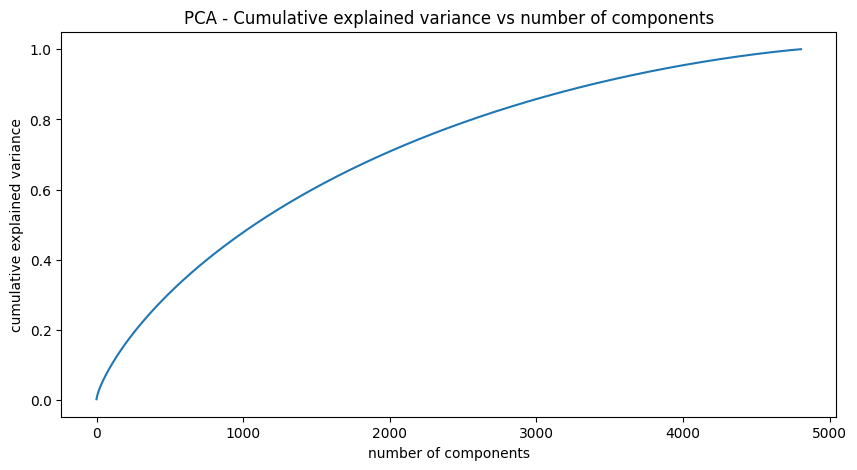

In [38]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [39]:
pca = PCA(n_components=4000)
pca.fit(X)

PCA(n_components=4000)

In [40]:
x_pca = pca.transform(X)

In [41]:
x_pca.shape

(4806, 4000)

#KNN clustring for clustering movies and tv shows

Text(0, 0.5, 'WCSS')

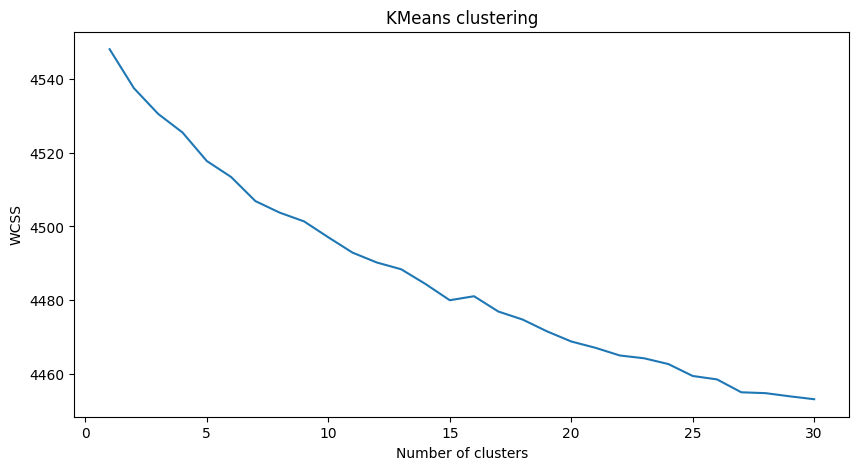

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

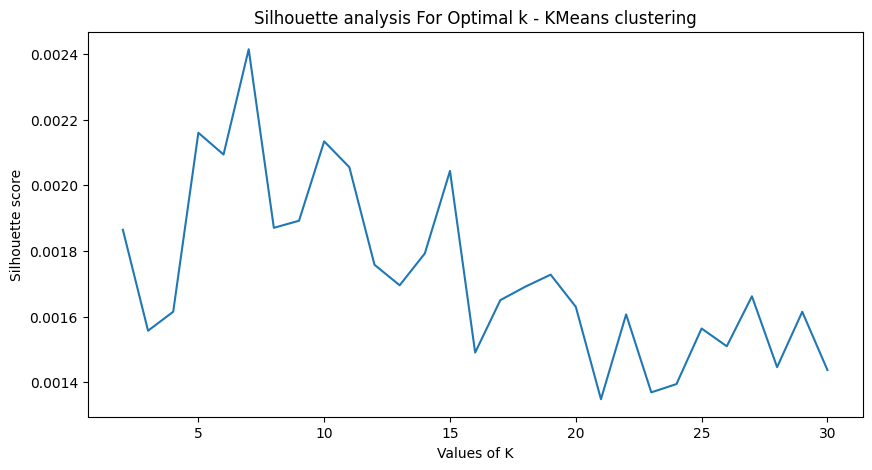

In [43]:
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [75]:
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [76]:
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(4513.451168847321, 0.0020937174866921208)


In [77]:
movies['kmeans_cluster'] = kmeans.labels_

In [78]:
movies.head(2)

,movie_id,title,tags,kmeans_cluster
0,19995,Avatar,"[22nd, century, paraplegic, marine, dispatched...",1
1,285,Pirates of the Caribbean: At World's End,"[captain, barbossa, long, believed, dead, come...",1


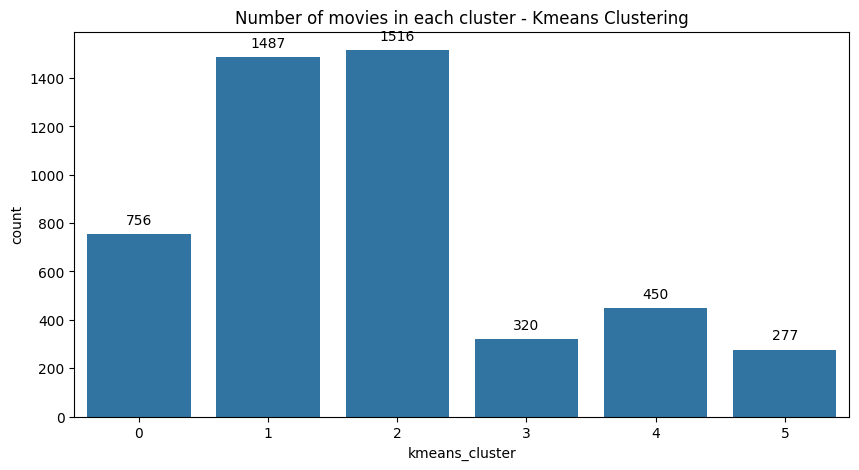

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
q = sns.countplot(x='kmeans_cluster', data=movies)  # Removed hue='type'
plt.title('Number of movies in each cluster - Kmeans Clustering')

# Annotate the count values on each bar
for i in q.patches:
    q.annotate(format(i.get_height(), '.0f'),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center',
               xytext=(0, 10), textcoords='offset points')

plt.show()

In [80]:
from collections import Counter

def vocab(movies, limit=5000):
    word_count = Counter()
    for doc in movies['tags']:
        word_count.update(doc)

    most_common_words = [word for word, count in word_count.most_common(limit)]
    return sorted(most_common_words)

def document_term_matrix(movies, normalization=False):
    vocabulary = vocab(movies)
    Actual_tdm = []
    for doc in movies['tags']:
        word_count = Counter(doc)
        if normalization:
            Actual_vector = [word_count[word] / len(doc) for word in vocabulary]
        else:
            Actual_vector = [word_count[word] for word in vocabulary]
        Actual_tdm.append(Actual_vector)
    return Actual_tdm

In [81]:
def get_clus(movies , name):
  l = movies[movies['title'] == name]['kmeans_cluster'].values[0]
  return movies[movies['kmeans_cluster'] == l]

In [90]:
def recommend(movie_name):
    df = get_clus(movies , movie_name)

    l = document_term_matrix(df)
    doc_term_mat = np.array(l)

    from sklearn.metrics.pairwise import cosine_similarity
    similarity = cosine_similarity(doc_term_mat)

    lsi = list(df['title'].values)
    index = lsi.index(movie_name)

    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])

    for i in distances[0:10]:
        print(df.iloc[i[0]].title)


recommend("Captain America: The First Avenger")

Captain America: The First Avenger
Captain America: Civil War
Saints and Soldiers
Red Tails
Fort McCoy
Sharkskin
Enemy at the Gates
Letters from Iwo Jima
The Great Escape
Unbroken
